<a href="https://colab.research.google.com/github/DavidJeonKr/lab_python/blob/master/ml10_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

# Wine 데이터 셋 준비

In [3]:
wine_csv = 'https://github.com/JakeOh/202110_itw_lab_python/raw/main/wine.csv'

In [4]:
wine = pd.read_csv(wine_csv)

In [5]:
wine.head(4)

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0


In [6]:
wine.tail(4)

,alcohol,sugar,pH,class
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0
6496,11.8,0.8,3.26,1.0


In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [12]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [17]:
columns = wine.columns[0:3]

In [20]:
feature_names = wine.columns[:-1]
target_names = ['red wine', 'white wine']

In [21]:
X = wine.iloc[:, :-1].values
y = wine['class'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [23]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([1279, 3918]))

In [24]:
np.unique(y_test, return_counts=True)

(array([0., 1.]), array([320, 980]))

In [25]:
tree_clf = DecisionTreeClassifier(random_state=42)

In [26]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
train_pred = tree_clf.predict(X_train)
train_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [29]:
accuracy_score(y_train, train_pred)

0.9978833942659227

In [30]:
confusion_matrix(y_train, train_pred)

array([[1276,    3],
       [   8, 3910]])

테스트 셋 평가

In [31]:
test_pred = tree_clf.predict(X_test)

In [32]:
confusion_matrix(y_test, test_pred)

array([[226,  94],
       [ 81, 899]])

In [33]:
accuracy_score(y_test, test_pred)

0.8653846153846154

# decision Tree 시각화

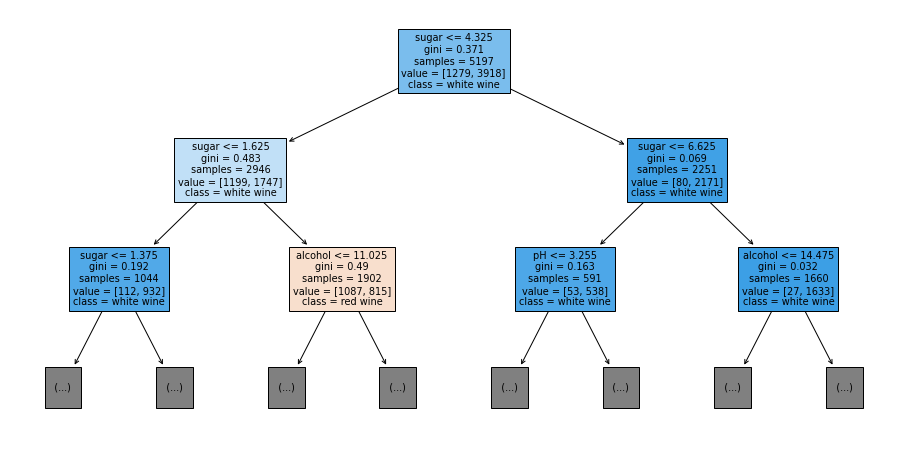

In [45]:
plt.figure(figsize=(16,8))
plot_tree(tree_clf, max_depth=2, feature_names=feature_names, class_names=target_names, filled=True)
plt.show()

In [38]:
wine.head(4)

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0


* Decision Tree의 장점
    * 특성들을 스케일 변환할 필요가 없음.
    * 결과를 이해하기 쉬윔
* Decision Tree의 단점
    * 과대적합(overfitting)이 되기 쉬움
        * 여러가지 규제를 적용해서 과대적합 문제를 해결해야 함